In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
gold_data = pd.read_csv('gld_price_data.csv')

In [7]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
 gold_data.shape

(2290, 6)

In [12]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
correlation = gold_data.corr()

C:\Users\dell\AppData\Local\Temp\ipykernel_7028\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

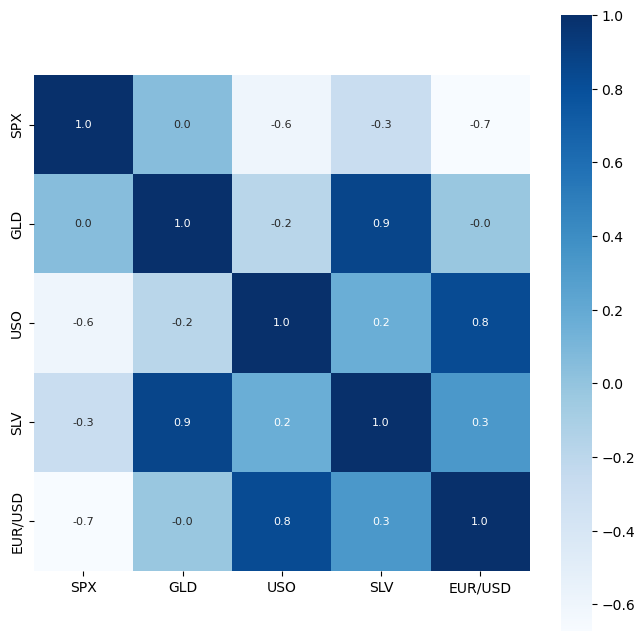

In [18]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation , cbar = True , square =True, fmt = '.1f' , annot = True , annot_kws={'size':8},cmap = 'Blues')

In [19]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\dell\AppData\Local\Temp\ipykernel_7028\2492781838.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

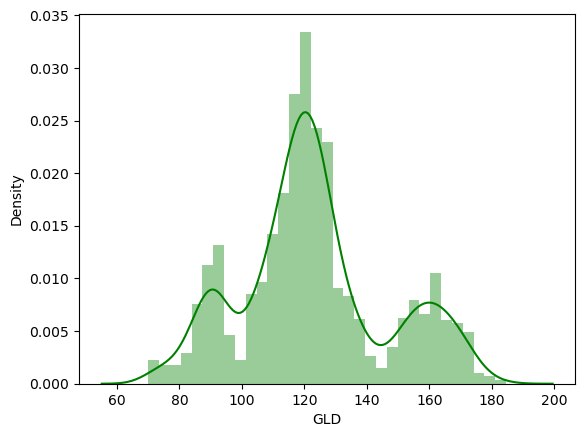

In [20]:
sns.distplot(gold_data['GLD'],color = 'green')

In [22]:
X = gold_data.drop(['Date','GLD'],axis = 1)

Y = gold_data['GLD']

In [23]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [25]:
X_train , X_test ,Y_train , Y_test = train_test_split(X, Y , test_size = 0.2 , random_state = 2)

In [26]:
regressor  = RandomForestRegressor(n_estimators = 100)

In [27]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [29]:
test_data_prediction = regressor.predict(X_test)

In [30]:
 print(test_data_prediction)

[168.74679994  82.02359981 115.87780041 127.73970065 120.74520129
 154.71789731 150.61549845 126.10140015 117.42859883 125.87670106
 116.70370095 171.841001   141.6497985  167.91719871 115.1775001
 117.9098002  139.56240268 170.18260077 159.49870277 155.97050004
 155.08950008 125.31810009 176.04299952 157.26480351 125.12260042
  93.76300003  77.30020057 120.57930017 119.1121992  167.44919967
  88.09669999 125.26759999  91.18950067 117.70250015 121.1145993
 135.9738015  115.52590133 115.32040045 148.1944998  107.06800079
 104.62590252  87.22419796 126.48920051 117.82680016 154.62889913
 119.43590032 108.38569999 108.08409846  93.1824005  127.25969747
  75.03200035 113.66679959 121.50920015 111.2604996  118.87559902
 120.80159927 159.56099974 168.83390089 147.15719693  85.79879863
  94.40500048  86.76749876  90.52300026 119.11460052 126.40900074
 127.54040029 168.76329966 122.18409957 117.41719887  98.45030032
 168.22180147 142.49259744 131.77470272 121.21260217 121.31999917
 119.7647005

In [31]:
error_score = metrics.r2_score(Y_test , test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9889116104179354


In [32]:
Y_test = list(Y_test)

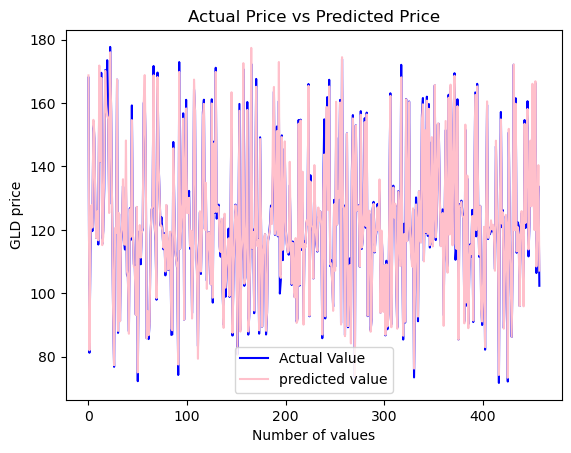

In [37]:
plt.plot(Y_test , color = 'blue' , label = 'Actual Value')
plt.plot(test_data_prediction , color= 'pink', label = 'predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()